In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = sns.load_dataset("taxis")
df.shape

(6433, 14)

In [3]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [5]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [6]:
df.describe(exclude="number")

,pickup,dropoff,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6433,6433,6389,6407,6388,6407,6388
unique,NaN,NaN,2,2,194,203,4,5
top,NaN,NaN,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,NaN,NaN,5451,4577,230,245,5268,5206
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,NaN,NaN,NaN,NaN,NaN,NaN
min,2019-02-28 23:29:03,2019-02-28 23:32:35,NaN,NaN,NaN,NaN,NaN,NaN
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,NaN,NaN,NaN,NaN,NaN,NaN
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,NaN,NaN,NaN,NaN,NaN,NaN
max,2019-03-31 23:43:45,2019-04-01 00:13:58,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df["duration"] = (df["dropoff"] - df["pickup"]).map(lambda x: x.total_seconds())

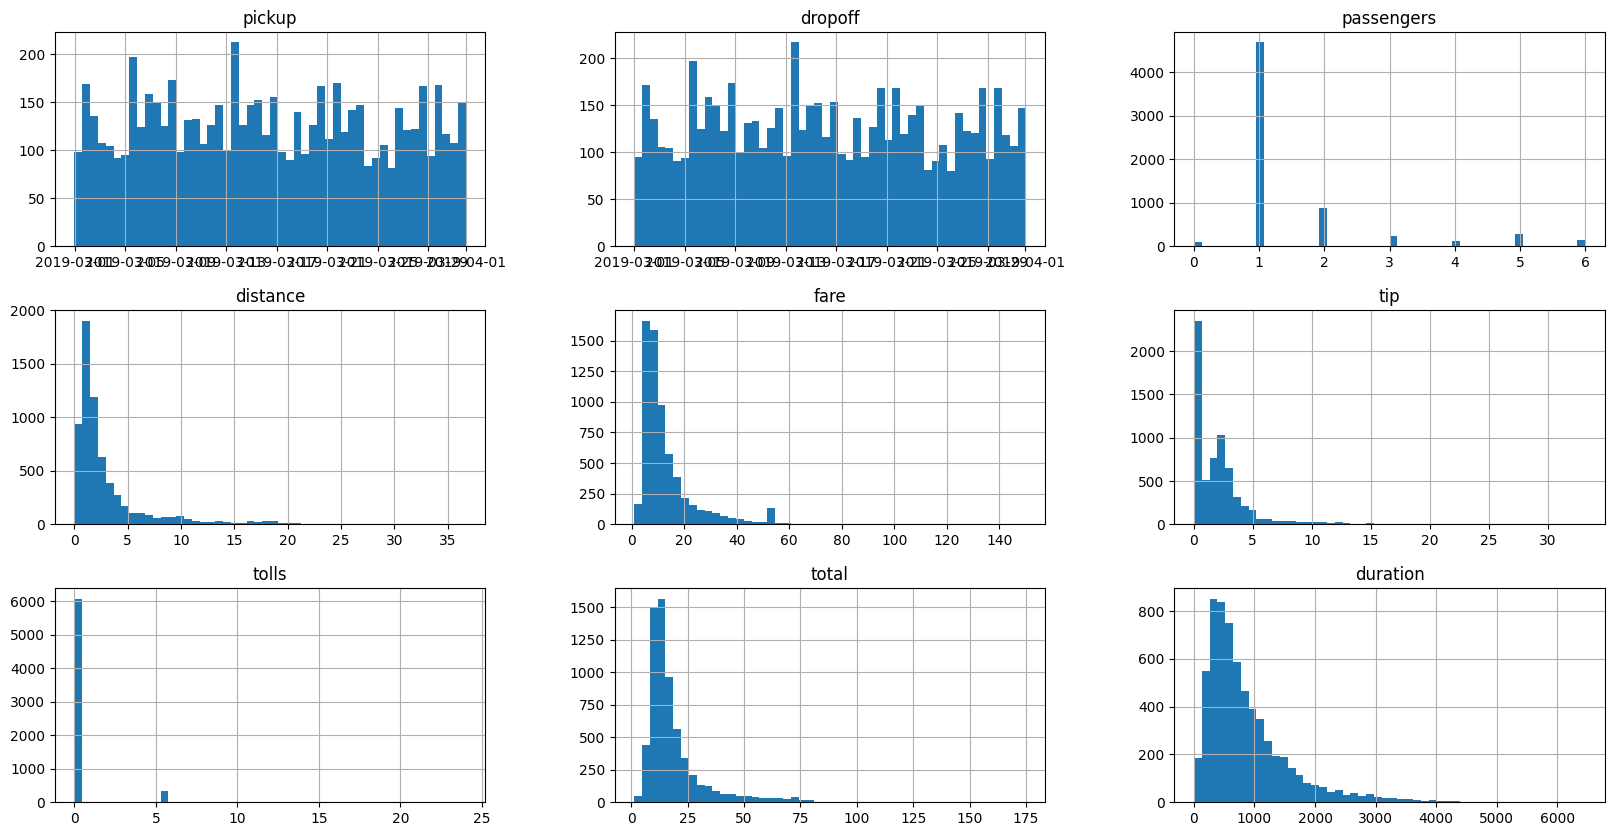

In [8]:
df.hist(bins=50, figsize=(20, 10));

In [9]:
df["payment"].value_counts()

payment
credit card    4577
cash           1812
Name: count, dtype: int64

<Axes: xlabel='payment', ylabel='count'>

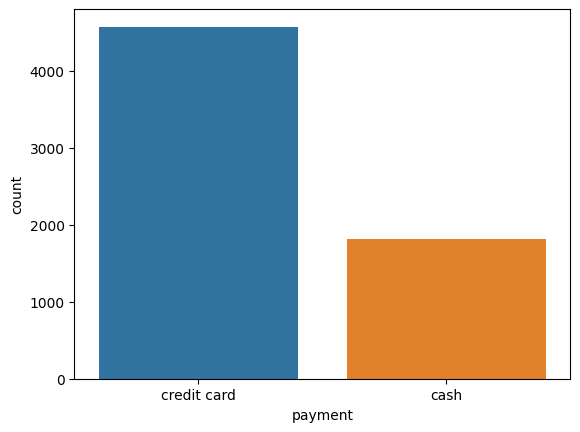

In [10]:
sns.countplot(data=df, x="payment")

<Axes: xlabel='payment', ylabel='fare'>

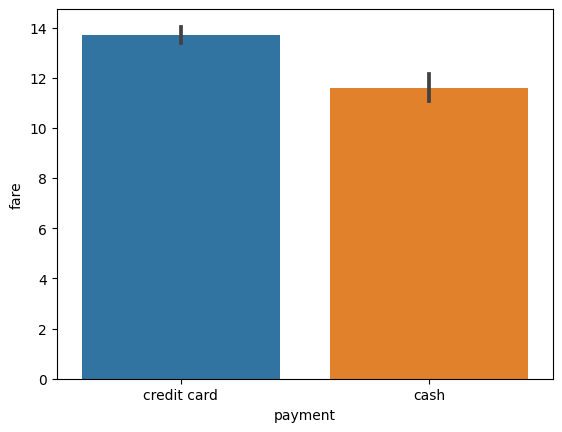

In [11]:
sns.barplot(data=df, x="payment", y="fare")

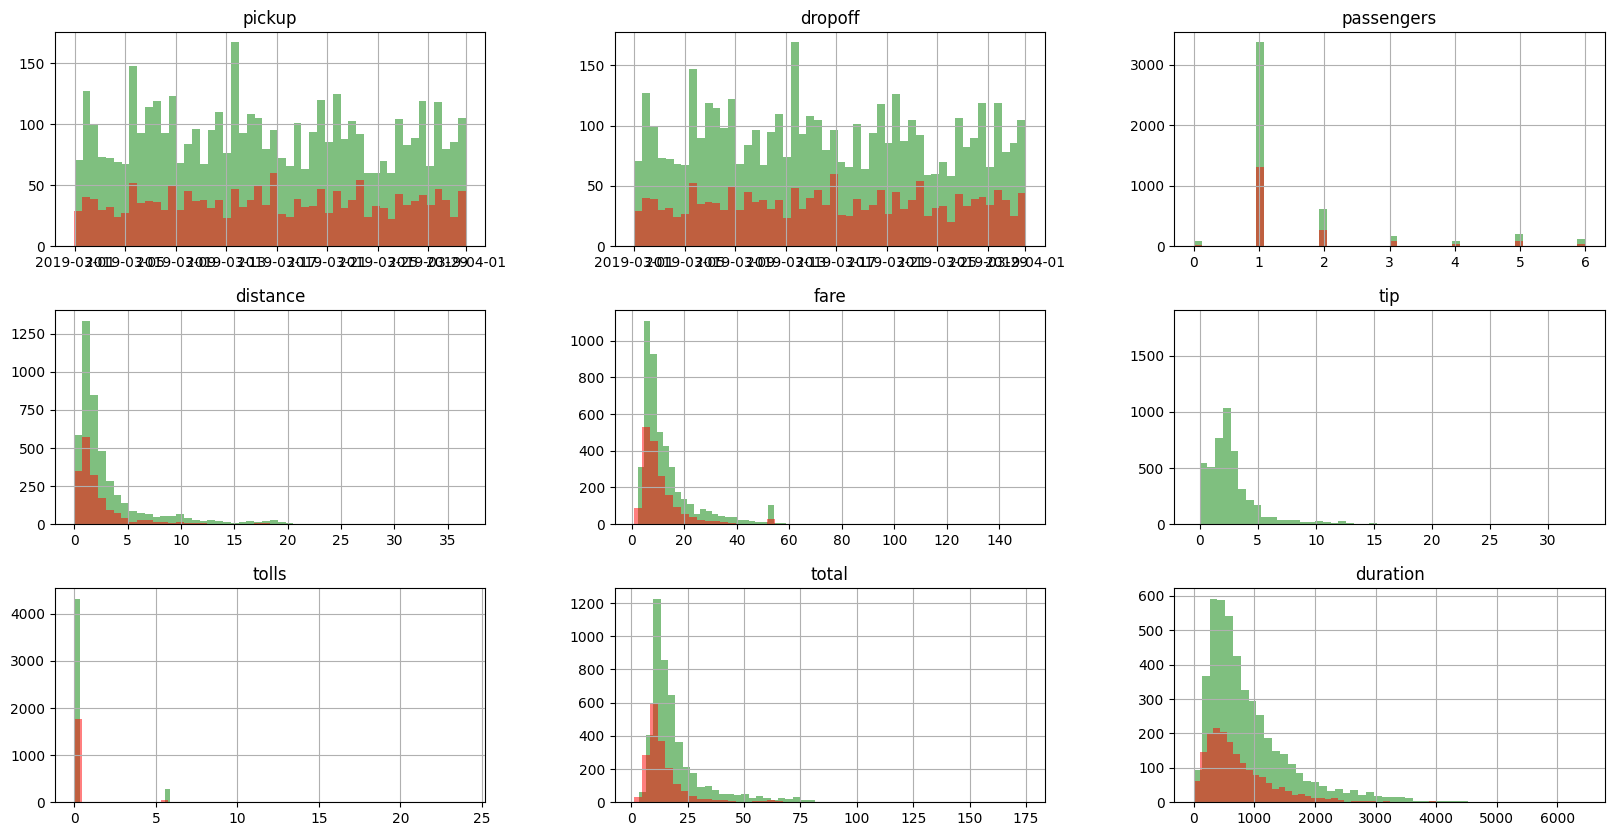

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
df[df["payment"] != "cash"].hist(bins=50, alpha=0.5, ax=axes, color="green");
df[df["payment"] == "cash"].hist(bins=50, alpha=0.5, ax=axes, color="red");

In [13]:
corr = df.corr(numeric_only=True)
corr

,passengers,distance,fare,tip,tolls,total,duration
passengers,1.000000,0.009411,0.007637,0.021099,-0.002903,0.015708,-0.004336
distance,0.009411,1.000000,0.920108,0.452589,0.635267,0.904676,0.821321
fare,0.007637,0.920108,1.000000,0.488612,0.609307,0.974358,0.848068
tip,0.021099,0.452589,0.488612,1.000000,0.413619,0.646186,0.387725
tolls,-0.002903,0.635267,0.609307,0.413619,1.000000,0.683142,0.459609
total,0.015708,0.904676,0.974358,0.646186,0.683142,1.000000,0.818791
duration,-0.004336,0.821321,0.848068,0.387725,0.459609,0.818791,1.000000


In [14]:
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

<Axes: >

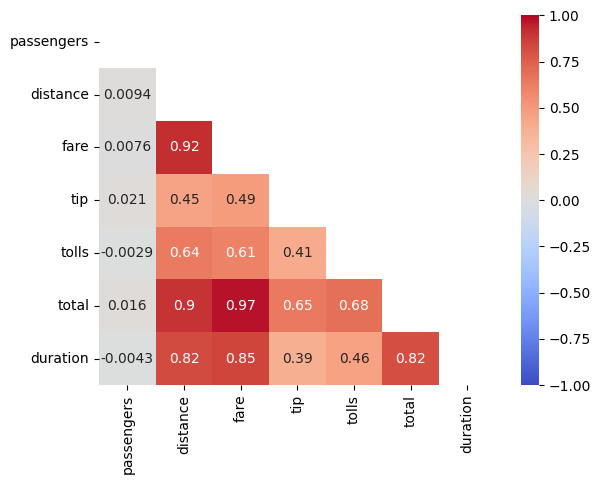

In [15]:
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", vmin=-1, vmax=1)

In [16]:
pick_drop_zone = pd.crosstab(df["pickup_zone"], df["dropoff_zone"])

<Axes: xlabel='dropoff_zone', ylabel='pickup_zone'>

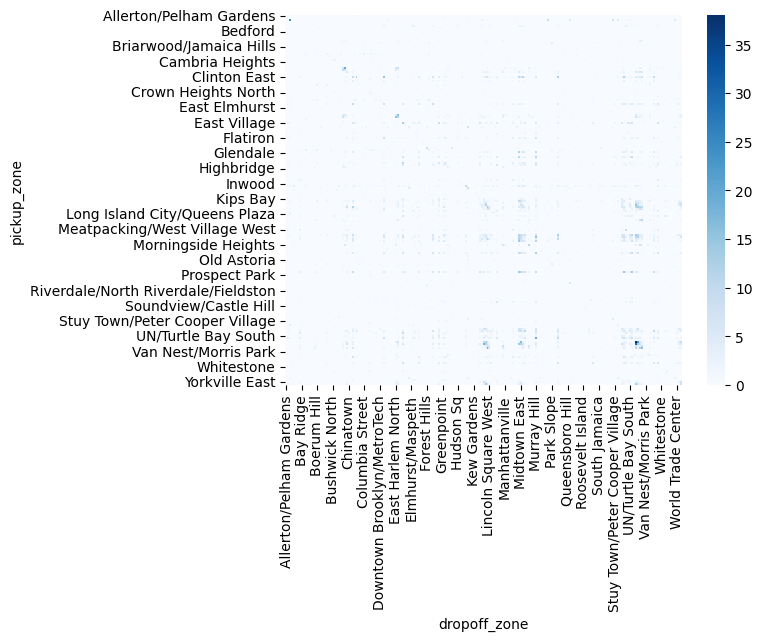

In [17]:
sns.heatmap(pick_drop_zone, cmap="Blues")

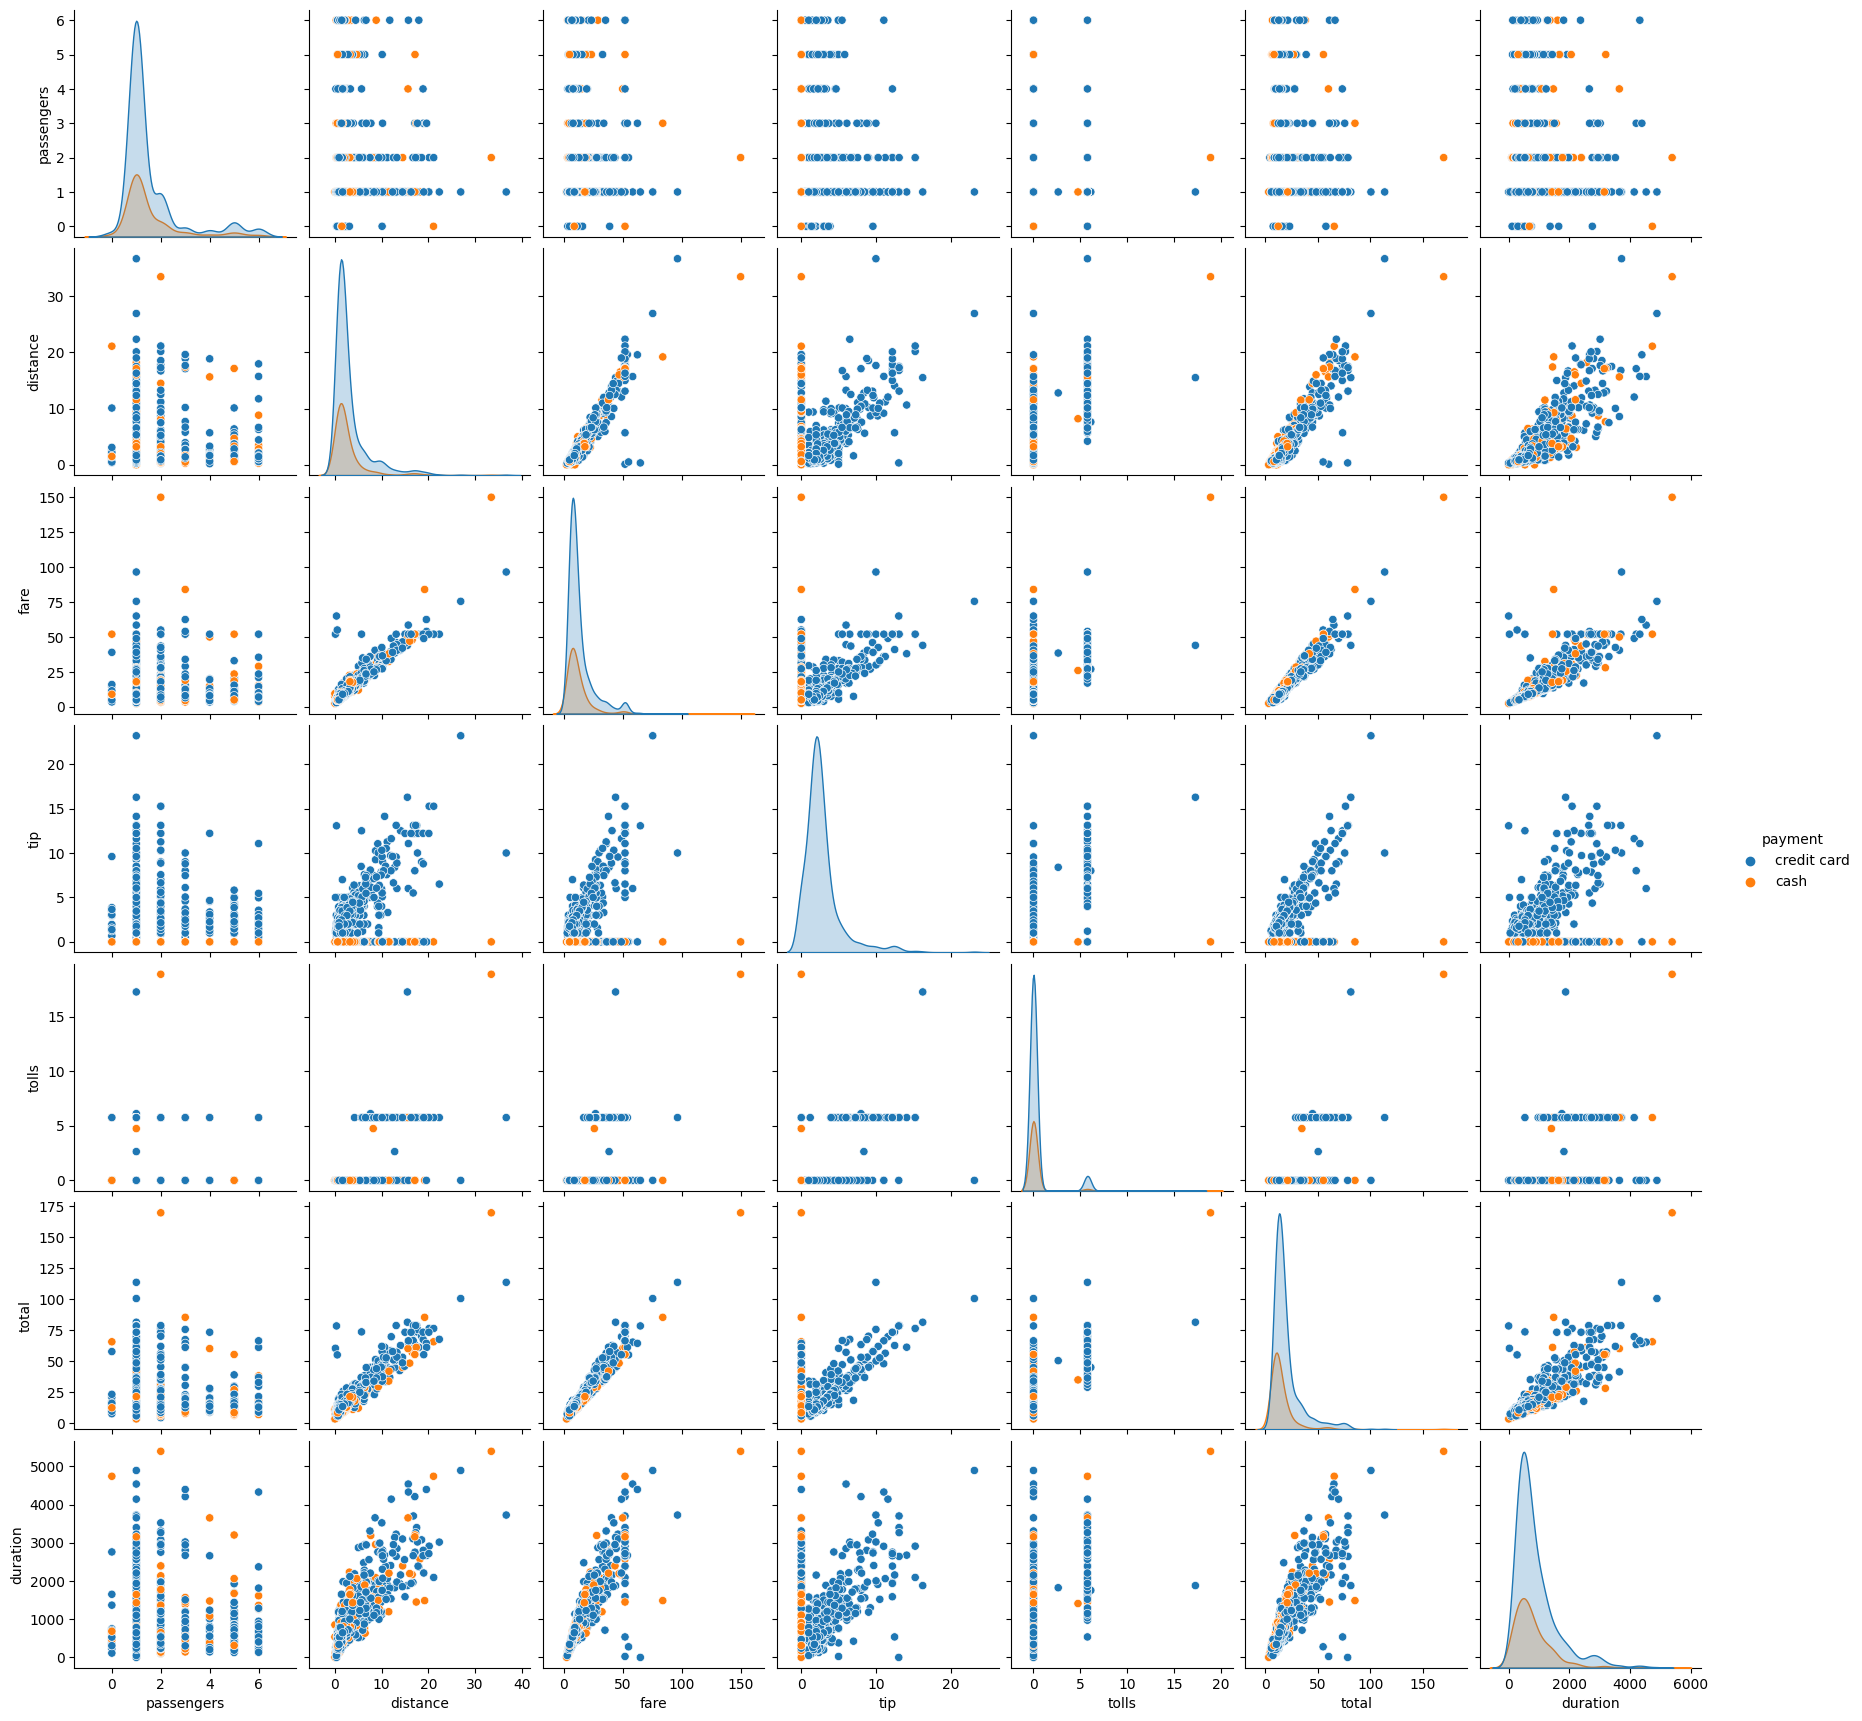

In [18]:
sns.pairplot(df.sample(frac=0.2), hue="payment")

In [19]:
pd.crosstab(df["color"], df["payment"])

payment,cash,credit card
color,,
green,400,577
yellow,1412,4000


<Axes: xlabel='color', ylabel='count'>

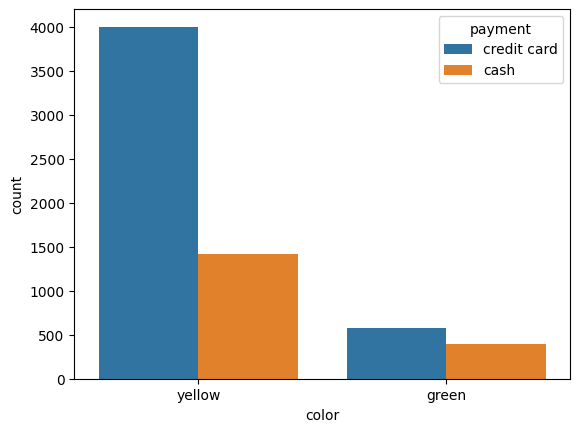

In [20]:
sns.countplot(data=df, x="color", hue="payment")